## EXPLORATORY DATA  ANALYSIS TO RECCOMEND THE MOST PROFITABLE PHONE BRANDS FOR A SMALL RETAIL STORE

A client who runs a small retail company is interested in selling phones on an eCommerce store, Jumia. The client has assigned the task of reccomending suitable phone brands for quick sales to me. The client would lilke phones that are not too expensive.

This project involves using a cleaned phone listing data set from the store to answer important questions that would aid making reccomendations for the client.

In order to make suitable reccomendations, we would provide answers to the following questions:

    1. How many brands are there?
    
    2. What brands charge the most?
    
    3. What are the top brands based on ratings and popularity (times reviewed)?
    
    4. What are the top 3 reccomendable brands based on price, rating and reviews?
    
    5. What specs are the most suitible?
    
 ## Summary of results:

The best 3 brands based on how good the prices are (not so expensive), the brand rating and the brand reviews are:

- Itel<br>
- Tecno<br>
- Intinix<br>

For these brands, they all have good prices (not too high), good ratings and good number reviews.



In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns
import numpy as np
import re

C:\Users\DANOLAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing cleaned data
df = pd.read_csv(r'C:\Users\DANOLAN\Desktop\Billions\Jumia_data_cleaning.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
#the data
df.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,ROM,RAM,mAh,camera,total_camera,screen_size(inch),star
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,70,10,64.0,4.0,5000.0,NaN,21.0,6.22,3.5
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",76,10,64.0,4.0,3000.0,16MP+5MP,21.0,5.20,4.0
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",86,99,32.0,4.0,3950.0,13MP,13.0,5.70,4.5
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,81,104,32.0,3.0,NaN,13MP,13.0,6.26,4.5
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",78,148,32.0,4.0,3950.0,13MP,13.0,5.70,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              502 non-null    object 
 1   current_price      502 non-null    int64  
 2   old_price          502 non-null    int64  
 3   discount           502 non-null    int64  
 4   description        502 non-null    object 
 5   ratings            502 non-null    int64  
 6   times_reviewed     502 non-null    int64  
 7   ROM                502 non-null    float64
 8   RAM                502 non-null    float64
 9   mAh                215 non-null    float64
 10  camera             334 non-null    object 
 11  total_camera       502 non-null    float64
 12  screen_size(inch)  502 non-null    float64
 13  star               502 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 49.1+ KB


### How many brands are there?

In [10]:
#checking the number of brands

print('\nthere are',df['brand'].nunique(),'different brands\n\n')

k = 1
for i in df['brand'].unique():
    print(k,i)
    k = k+1


there are 55 different brands


1 Gionee
2 Nokia
3 UMIDIGI
4 Tecno
5 Oukitel
6 Samsung
7 Leagoo
8 Infinix
9 Cubot
10 Letv
11 Ulefone
12 Blackview
13 Oneplus
14 Doogee
15 Huawei
16 XIAOMI
17 Leagoo Lead 7
18 Homtom
19 Itel
20 Fero
21 Motorola
22 LG
23 Sony
24 Elite
25 Oppo
26 Nomu
27 Bontel
28 Unicorn
29 Jodom
30 AfriOne
31 Swiss
32 Lenovo
33 Gome
34 Desire
35 Vernee
36 Elephone
37 SOYES
38 Asus
39 Hisense
40 Honor
41 Letv Leeco
42 Sharp
43 Alcatel
44 Htc
45 Leeco
46 Kismo
47 Arashi
48 Partner
49 ZTE
50 M Horse
51 Hoot
52 Cool Pad
53 Melrose
54 Blackberry
55 Sailf


We can see that there are 55 different brands and we can see them listed out.

## Which brands charge the most?

Firstly we will remove brands with less than 10 phones stocked. This is to increase the relibility of our results.

In [6]:
df = df.groupby('brand').filter(lambda x: len(x)>=10)  # selecting only brands with 10 or more phones


Here we will find out which brands charge the most by analyzing the current prices of phones for each brand.

We would do this by creating a function that will generate a new dataframe from df that contains: The mean current price for all phones, the number of phones for a given brand, the number of phones above and below the mean current price (of all phones) for a given brand, the percentage of phones in a brand above and below the mean current price (of all phones) and the mean price of phones for a particular brand.


In [7]:

def Analyze(value):
    '''
    Generates a dataframe that contains: The mean current price for all phones, the number of phones for a brand, the number
    of phones above and below the mean current price, the percentage of phones in a brand above and below the mean current price
    and the mean price of phones for a particular brand.
    
    Args:
        value (pandas DataFrame): Accepts a dataframe.
    
    return:
        new_df (pandas DataFrame): Returns a DataFrame that displays some statistics for each unique brand in value.
    '''
    
    mean = round(value['current_price'].mean(),0) # mean current_price for all phones
    
    # initializing variables
    no_of_phones,no_above_mean,no_below_mean,percentage_above_mean,percentage_below_mean,brand_mean=([],[],[],[],[],[])
    
    brand_names = df['brand'].unique()   # storing the name of each unique brand .
    print('\n','The mean current price for all phones is:',mean)
    
    #looping through the brand names
    for i in brand_names:
       
        sub_df = value[value['brand']==i]  # indexing the dataframe with a brand name to get a sub set dataframe for the brand
        
        entries = len(sub_df.index) #counting the no of entries for a particular brand
        
        #indexing for current_price above and below the mean, the percentages and no of phones for the brand
        
        current_price_above_mean = sub_df[sub_df['current_price']>mean]  # for current_price greater than the mean
        current_price_below_mean = sub_df[sub_df['current_price']<mean]  # for current_price less than the mean
        
        brand_mean_ = round(sub_df['current_price'].mean(),0)  # the mean current price for a particular brand
        
        # counting the number of entries with current_price above and below the mean
        count_above_mean = len(current_price_above_mean.index)  
        count_below_mean = len(current_price_below_mean.index)
        
        # evaluating the percentage of entries above and below mean
        percent_above_mean = int(round((count_above_mean/entries)*100,1))
        percent_below_mean = int(round((count_below_mean/entries)*100,1))
        
        #appending
        no_of_phones.append(entries)
        no_above_mean.append(count_above_mean)
        no_below_mean.append(count_below_mean)
        percentage_above_mean.append(percent_above_mean)
        percentage_below_mean.append(percent_below_mean)
        brand_mean.append(brand_mean_)
    
    # storing each variable in a list, i.e. creating a list of lists.
    data = [brand_names,no_of_phones,no_above_mean,no_below_mean,percentage_above_mean,percentage_below_mean,brand_mean]
    
    # storing the column headers 
    headers = ['brand','no_of_phones','no_above_mean','no_below_mean','%_above_mean','%_below_mean','brand_mean_price']
    
    # creating a new dataframe
    new_df = pd.DataFrame(dict(zip(headers,data)),index = [i for i in range(1,df['brand'].nunique()+1)])
    
    return new_df    


In [17]:
# Displaying the new dataframe with some style

df2 = Analyze(df).sort_values('brand_mean_price',ascending=False)  # sorting df2 by brand_mean_price

df2.index = [i for i in range(1,df['brand'].nunique()+1)]  # resetting the indices

df2.style.background_gradient(cmap='Greys')  # displaying df2 with style


 The mean current price for all phones is: 75848.0


,brand,no_of_phones,no_above_mean,no_below_mean,%_above_mean,%_below_mean,brand_mean_price
1,Samsung,65,47,18,72,27,157856.000000
2,Blackview,19,8,11,42,57,89099.000000
3,Oppo,10,8,2,80,20,88256.000000
4,Huawei,36,14,22,38,61,84465.000000
5,XIAOMI,30,12,18,40,60,73598.000000
6,Infinix,23,4,19,17,82,63409.000000
7,LG,20,8,12,40,60,60465.000000
8,Gionee,56,15,41,26,73,60351.000000
9,Tecno,33,3,30,9,90,52864.000000
10,Lenovo,11,1,10,9,90,51258.000000


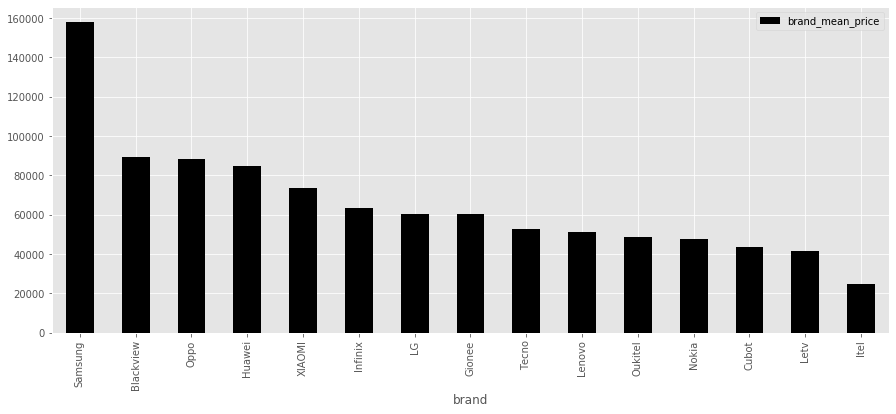

In [9]:
df2.plot(kind='bar',x='brand',y='brand_mean_price', color='black', figsize=(15,6))

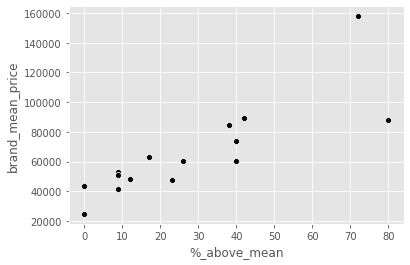

In [48]:
sns.scatterplot(x = '%_above_mean',y='brand_mean_price',data=df2,color='black')

<b>NOTE:</b>

<b>no_of_phones</b> = No of phones for a given brand

<b>no_above_mean</b> = No of phones for a given brand above the mean current price for all phones

<b>no_below_mean</b> = No of phones for a given brand below the mean current price for all phones

<b>%_above_mean</b> = percentage of phones for a given brand above the mean current price for all phones

<b>%_below_mean</b> = percentage of phones for a given brand below the mean current price for all phones

<b>brand_mean_price</b> = mean current price for a given brand



From the above dataframe we can tell that the brands with the top 5 highest average curent prices are: Samsung, Blackview, Oppo,Huawei and XIAOMI.

If we check the top 5 brands with respect to the average column, we would notice that they have more than 35% of their phones prices above the mean current price for all phones.

<b>The top brands are brands that have a high brand_mean_price and high %_above_mean</b>


From the above analysis we can see that the <b>top 5 brands according to their mean current prices are: Samsung, Blackview, oppo, Huawei and XIAOMI</b>. These brands all have over 35% phone prices above mean current price of all phones. Brands with lower mean current prices tend to have lower precentages of their phone prices above the mean current price for all phones.

From this analysis it is clear that the how much a brand charges can be evaluated by knowing its mean current price, the percentage of phones of that brand above the mean current price of all phones and averaging both values. Using this the top 5 brands that charge the most are: <b>
    
- Samsung<br>
- Blackview<br>
- oppo<br>
- Huawei<br>
- XIAOMI<br>



## What are the top brands based on ratings and popularity (times reviewed)?

We will use an approach similar to that used in evaluating the brands that charge the most but we would be including the mean review and <b>retail_suitability</b>.
    
I have defined <b>retail_suitability</b> for a brand to be the average of the percentage of phones for that brand above the mean rating for all phones, mean rating for that brand and the mean no of times reviewed for that brand.
    
Top brands would be evaluated based on retail suitability.


In [12]:

def Analyze_(value):
    '''
    Generates a dataframe that contains: The mean rating for all phones, the number of phones for a brand, the number
    of phones above and below the mean rating, the percentage of phones in a brand above and below the mean rating,
    the mean rating of phones for a particular brand and mean number of times reviewed for a brand.
    
    Args:
        value (pandas DataFrame): Accepts a dataframe.
    
    return:
        new_df (pandas DataFrame): Returns a DataFrame that displays some statistics for each unique brand in value.
    '''
    mean = round(value['ratings'].mean(),0)  # mean rating for all phones
    
    # initializing variables
    no_of_phones,no_above_mean,no_below_mean,percentage_above_mean,percentage_below_mean,brand_mean,mean_review=([],[],[],[],[],[],[])
    
    brand_names = df['brand'].unique()  # getting each unique brand name
    print('\n','The mean rating for all phones is:',mean)
    
    #looping through the brand names
    for i in brand_names:
        #creating a df 
        sub_df = value[value['brand']==i]   # indexing the dataframe with a brand name to get a sub set dataframe for the brand
        
        entries = len(sub_df.index)   #counting the no of entries
        
        #indexing for current_price above and below the mean, the percentages and no of phones for the brand
        
        rating_above_mean = sub_df[sub_df['ratings']>mean]  # for current_price greater than the mean rating
        rating_below_mean = sub_df[sub_df['ratings']<mean]   # for current_price less than the mean rating
        
        brand_mean_ = round(sub_df['ratings'].mean(),0)  # mean raring for a unique brand
        
        _mean_review =  round(sub_df['times_reviewed'].mean(),0)   # mean number of reviews for a specific brand
        
        # counting the number of entries with current_price above and below the mean
        count_above_mean = len(rating_above_mean.index)
        count_below_mean = len(rating_below_mean.index)
        
        # evaluating the percentage of entries above and below mean
        percent_above_mean = int(round((count_above_mean/entries)*100,1))
        percent_below_mean = int(round((count_below_mean/entries)*100,1))
        
        #appending
        no_of_phones.append(entries)
        no_above_mean.append(count_above_mean)
        no_below_mean.append(count_below_mean)
        percentage_above_mean.append(percent_above_mean)
        percentage_below_mean.append(percent_below_mean)
        brand_mean.append(brand_mean_)
        mean_review.append(_mean_review)

    
    # storing each variable (list) in a list ie creating a list of lists
    data = [brand_names,no_of_phones,no_above_mean,no_below_mean,percentage_above_mean,
            percentage_below_mean,brand_mean,mean_review]
    
    # storing column names in a list
    headers = ['brand','no_of_phones','no_above_mean','no_below_mean','%_above_mean','%_below_mean',
               'brand_mean_rating','brand_mean_review']
    
    new_df = pd.DataFrame(dict(zip(headers,data)),index = [i for i in range(1,16)])  # creating a df

    #definig retail_suitability and creating a column for it
    new_df['retail_suitability'] =(new_df['%_above_mean']+new_df['brand_mean_rating']+new_df['brand_mean_review'])/3

    return new_df    

In [13]:
# Displaying the new dataframe with some style

df3 = Analyze_(df).sort_values('retail_suitability',ascending=False)
df3.index = [i for i in range(1,16)]
df3.style.background_gradient(cmap='Greys')


 The mean rating for all phones is: 84.0


,brand,no_of_phones,no_above_mean,no_below_mean,%_above_mean,%_below_mean,brand_mean_rating,brand_mean_review,retail_suitability
1,Itel,20,14,6,70,30,88.000000,51.000000,69.666667
2,Tecno,33,21,11,63,33,86.000000,50.000000,66.333333
3,Samsung,65,50,15,76,23,86.000000,24.000000,62.000000
4,Infinix,23,18,4,78,17,87.000000,18.000000,61.000000
5,Gionee,56,20,34,35,60,78.000000,60.000000,57.666667
6,Letv,11,8,3,72,27,86.000000,8.000000,55.333333
7,Nokia,46,25,19,54,41,83.000000,28.000000,55.000000
8,Huawei,36,22,14,61,38,84.000000,20.000000,55.000000
9,Oppo,10,7,3,70,30,92.000000,2.000000,54.666667
10,Oukitel,16,5,10,31,62,79.000000,46.000000,52.000000


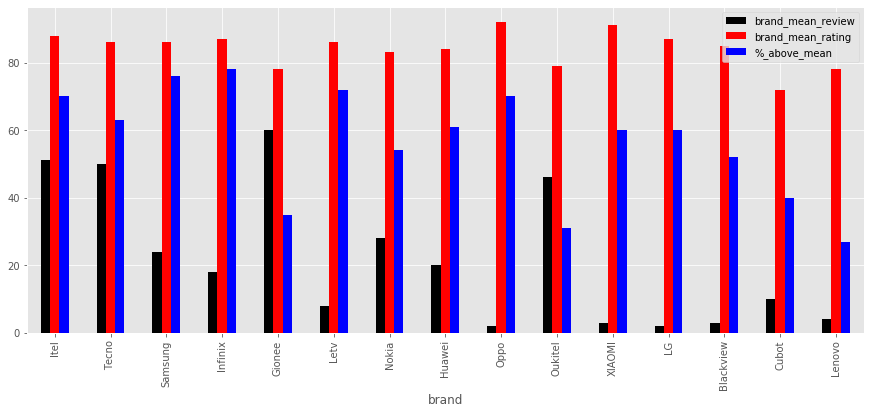

In [14]:
# creating a bar plot
df3.plot(kind='bar',x='brand',y=['brand_mean_review','brand_mean_rating','%_above_mean'],
         color=['black','red','blue'], figsize=(15,6))

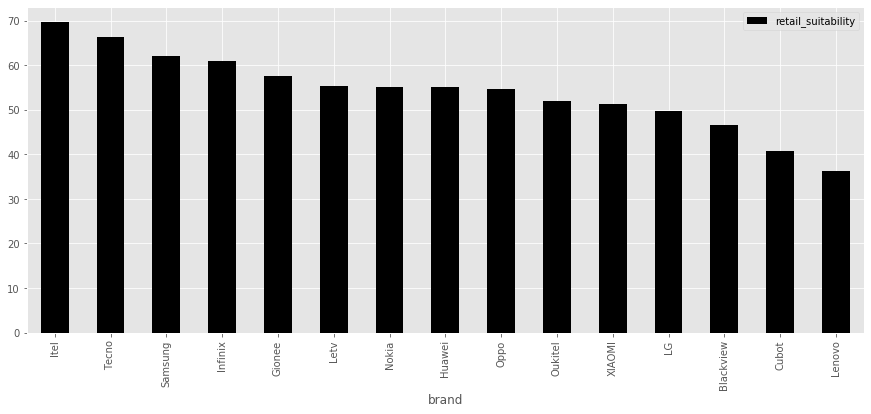

In [15]:
# creating a bar plot
df3.plot(kind='bar',x='brand',y=['retail_suitability'], color=['black'], figsize=(15,6))

In [16]:
# Extracting the top 5  brands based on the retail_suitability

df3.sort_values('retail_suitability',ascending=False,inplace=True)  # sorting values according to retail_suitability

df3.index = [i for i in range(1,len(df3['brand'])+1)]   # replacing the indices
print('\nThe top 5 brands based on the retail_suitability are:')

df3.head(5).style.background_gradient(cmap='Greys') # displaying  df3 using style


The top 5 brands based on the retail_suitability are:


,brand,no_of_phones,no_above_mean,no_below_mean,%_above_mean,%_below_mean,brand_mean_rating,brand_mean_review,retail_suitability
1,Itel,20,14,6,70,30,88.000000,51.000000,69.666667
2,Tecno,33,21,11,63,33,86.000000,50.000000,66.333333
3,Samsung,65,50,15,76,23,86.000000,24.000000,62.000000
4,Infinix,23,18,4,78,17,87.000000,18.000000,61.000000
5,Gionee,56,20,34,35,60,78.000000,60.000000,57.666667



<b>NOTE:</b>
<b>retail_suitability = (%_above_mean + brand_mean_rating + brand_mean_review)/3</b>

<b>no_of_phones</b> = No of phones for a given brand

<b>no_above_mean</b> = No of phones for a given brand above the mean rating for all phones

<b>no_below_mean</b> = No of phones for a given brand below the mean rating for all phones

<b>%_above_mean</b> = percentage of phones for a given brand above the mean rating for all phones

<b>%_below_mean</b> = percentage of phones for a given brand below the mean rating for all phones

<b>brand_mean_price</b> = mean current price for a given brand

<b>brand_mean_review</b> = mean times_reviewed for a given brand


To evaluate top brands, for each brand we would find the average of %_above_mean, brand_mean_rating and brand_mean_review. We will call this <b>retail_suitability</b> 

<b>retail_suitability = (%_above_mean + brand_mean_rating + brand_mean_review)/3</b><br>

Good brands have good ratings, reviews and a good percentage of their phones above the mean rating of all phones.

<b>
The top 5 brands based on rating and reviews are:
<br>


- Itel<br>
- Tecno<br>
- Samsung<br>
- Infinix<br>
- Gionee<br>

## What are the top 3 reccomendable brands based on price, rating and reviews?

The top 5 brands that charge the most are: Samsung, Blackview, oppo, Huawei and XIAOMI.

The top 10 brands based on ratings and reviews are: Itel, Tecno, Samsung, Infinix and Gionee.

The top reccomendable brands are brands with:

1. Good rating
2. Good price (not too expensive)

We will sellect top brands based on rating that do not appear in the top brands based on price.

The Top brands based on price, rating and reviews are:
<b>
    1. Itel
    2. Tecno
    3. Intinix


# What specs are the most suitible?

Here we would find out what specs are the most suitible by creating a table that shows each spec (RAM an ROM), its average rating and its average price.

In [62]:
#creating a dataframe of ram,mean current price and rating
ram = df[['RAM','ratings','current_price']].groupby('RAM').mean().sort_values('ratings',ascending=False)

ram.style.background_gradient(cmap='Greys') # displayinh ram with style

,ratings,current_price
RAM,,
12.0,95.000000,440000.000000
8.0,90.500000,213985.250000
6.0,87.726027,127823.547945
1.0,86.422222,33368.400000
4.0,83.709677,72707.122581
3.0,81.727273,48652.090909
2.0,80.733333,42529.311111


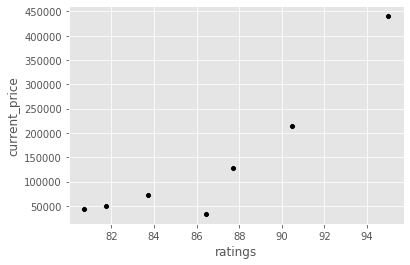

In [63]:
sns.scatterplot(x='ratings',y='current_price',data=ram, color='black') # scatter plot

From the above table we can see that the top 5 RAM specs according to rating are:

- 12.0 GB<br>
- 8.0 GB<br>
- 6.0 GB<br>
- 1.0 GB<br>
- 4.0 GB<br>

However from the plot we can see that the higher the rating, the higher the price. We would remove the top two ROM's with the highest average price from our selection. Hence the three reccomendable RAM's are:
<b>
- 6.0 GB<br>
- 1.0 GB<br>
- 4.0 GB<br>


In [19]:
#creating a dataframe of r0m,mean current price and rating
df[['ROM','ratings',
    'current_price']].groupby('ROM').mean().sort_values('ratings',ascending=False).style.background_gradient(cmap='Greys')

,ratings,current_price
ROM,,
4.0,100.000000,30900.000000
128.0,90.545455,162306.636364
256.0,88.333333,361666.666667
8.0,88.153846,24857.153846
64.0,84.614815,84152.844444
16.0,82.935484,36804.822581
32.0,81.364964,49531.182482


From the above table we can see that the most rated ROM is 4GB ram and it doesn't have the highest mean price.

From the above table we can see that the top 5 ROM specs according to rating are:

- 4.0 GB<br>
- 128.0 GB<br>
- 256.0 GB<br>
- 8.0 GB<br>
- 64.0 GB<br>

from this list we will exclude the top 2 specs with the highest mean prices.

Our list of top 3 reccomendable specs are:
<b>
- 4.0 GB<br>
- 8.0 GB<br>
- 64.0 GB<br>



# Results

From the above analysis done so far, we will put all results together and derive insights.

The best 3 brands based on how good the prices are, the brand rating and the brand reviews are:

- Itel<br>
- Tecno<br>
- Intinix<br>

For these brands, they all have good prices (not too high), good ratings and good number reviews.

The best RAM and ROM based on ratings and good price are:

RAM: 
- 6.0 GB<br>
- 1.0 GB<br>
- 4.0 GB<br>

ROM: 
- 4.0 GB<br>
- 8.0 GB<br>
- 64.0 GB<br>


# Specific reccomended phones.

In [20]:
print('\n The DataFrame below contains the reccomended phones for the client')

specific_brands = df[(df['brand']=='Itel')|(df['brand']=='Tecno')|(df['brand']=='Intinix')] #specifying brands

specific_rom = specific_brands[(specific_brands['ROM']==4.0)|
                               (specific_brands['ROM']==8.0)|(specific_brands['ROM']==64)]  #specifying ROM

specific_ram = specific_rom[(specific_rom['RAM']==6.0)|
                            (specific_rom['RAM']==4.0)|(specific_rom['RAM']==1.0)]  # specifying the RAM

specific_ram


 The DataFrame below contains the reccomended phones for the client


,brand,current_price,old_price,discount,description,ratings,times_reviewed,ROM,RAM,mAh,camera,total_camera,screen_size(inch),star
13,Tecno,59900,65000,8,"Pouvoir 3 Plus (LB8a) 6.35"" AMOLED (64GB ROM+ ...",80,4,64.0,4.0,6000.0,13MP+8MP+2MP+8MP,31.0,6.35,4.0
71,Tecno,24000,30000,20,"F1 5-Inch (1GB, 8GB ROM) Android 8 Oreo (Go Ed...",76,10,8.0,1.0,NaN,5MP+2MP,7.0,5.00,4.0
74,Tecno,59000,59000,0,"Pouvoir 3 Plus (LB8a), 6.35"", (64GB ROM+ 4GB R...",100,1,64.0,4.0,6000.0,13MP+8MP+2MP+8MP,31.0,6.35,5.0
112,Tecno,23000,30000,23,"F1 5-Inch (1GB, 8GB ROM) Android 8 Oreo (Go Ed...",87,3,8.0,1.0,NaN,5MP+2MP,7.0,5.00,4.5
114,Tecno,22000,22000,0,"F1 5-Inch (1GB, 8GB ROM) Android 8.1 Go Editio...",80,2,8.0,1.0,NaN,5MP+2MP,7.0,5.00,4.0
116,Itel,21244,24000,11,"A32F 5"" Screen, Android 8.1, 8GB ROM + 1GB RAM...",77,112,8.0,1.0,NaN,5MP+2MP,7.0,5.00,4.0
120,Tecno,61990,65000,5,"Pouvoir 3 Plus, 6.35"" Amoled (64GB ROM+ 4GB RA...",80,3,64.0,4.0,6000.0,13MP+8MP+2MP+13MP,36.0,6.35,4.0
124,Itel,19900,19900,0,"A16 Plus 5.0"" Screen Android 8.1 Go Edition, 1...",100,1,8.0,1.0,2050.0,5MP+2MP,7.0,5.00,5.0
134,Tecno,75000,75000,0,Camon 12 Pro CC9 6GB RAM 64GB ROM Android 9 Tr...,100,5,64.0,6.0,NaN,16MP+8MP+2MP+32mp,58.0,6.00,5.0
136,Tecno,59970,75000,20,"Pouvoir 3 Plus (LB8a), 6.35"", (64GB ROM+ 4GB R...",94,9,64.0,4.0,6000.0,13MP+8MP+2MP+13MP,36.0,6.35,5.0
